## Simple Linear Regression 簡單線性回歸
簡單線性回歸對於尋找兩個連續變量之間的關係很有用。一個是預測變量或自變量，另一個是響應變量或因變量。它尋找「統計關係」而不是確定性關係「一個變量可以由另一個變量表達」。例如，使用攝氏溫度預測華氏溫度。或是身高和體重之間的關係。

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

我們有一個數據集觀察了許多學生成績的資訊，裡面有 (1) 閱讀時數 time_study (2) 分數 Marks。這是我們的訓練數據。目標是設計一個模型，如果給定學習的小時數，該模型可以預測分數。使用訓練數據，可以獲得一條回歸線，它將給出最小的誤差。

In [2]:
df = pd.read_csv('data/marks2.csv', index_col=False)
df.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [3]:
df.shape #Data Shape

(100, 2)

# Data Visualization

這條回歸線的公式必須選擇值 b0 和 b1 以使它們最小化錯誤。如果將誤差平方和作為評估模型的指標，則目標是獲得一條最能減少誤差的直線。

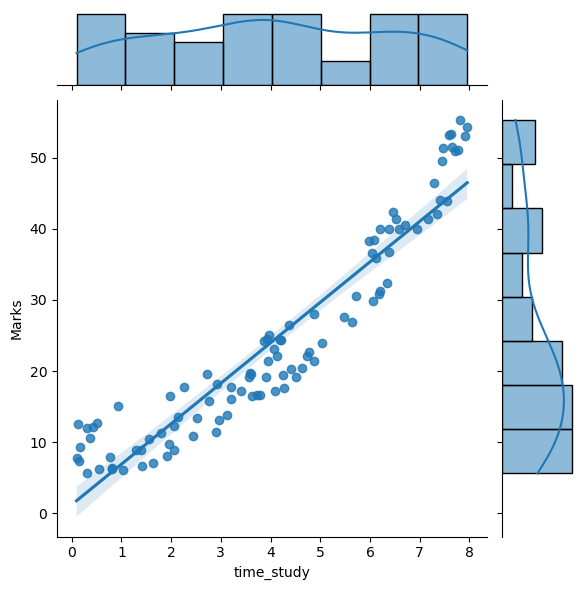

In [4]:
# resource: https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot
sns.jointplot(x=df['time_study'], 
              y=df['Marks'], 
              data=df, 
              kind='reg') # kind = 'reg' 以線性回歸擬和

- 可以從上表看出回歸擬和模型線（結果）該公式為 【y = b0 + b1*x】

## Splitting data into test and train

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['time_study'].values.tolist(), 
                                                    df['Marks'].values.tolist(), 
                                                    test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))
#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (80, 1)
Test - Predictors shape (20, 1)
Train - Target shape (80, 1)
Test - Target shape (20, 1)


## Linear Regression using Scikit-Learn
使用 Scikit-Learn 實現線性回歸模型，計算 【y = b0 + b1*x】。
- 得出【 y = Intercept + Slpo * x】=【 y = 2.5 + 5.3x】

In [6]:
cls = linear_model.LinearRegression()   # 使用 SKlearn 中的LinearRegression模組來擬合數據
cls.fit(x_train,y_train)                # Fit 用於將訓練數據(training data)擬合(fitting)到模型中

print('regression Parameters: Intercept',cls.intercept_) #截距
print('regression Parameters: Co-efficient',cls.coef_)   #參數(斜率)

regression Parameters: Intercept [2.51556551]
regression Parameters: Co-efficient [[5.35532153]]


In [7]:
prediction = cls.predict(x_test)        # 執行預測計算出 y 

Text(0.5, 1.0, 'Linear Regression')

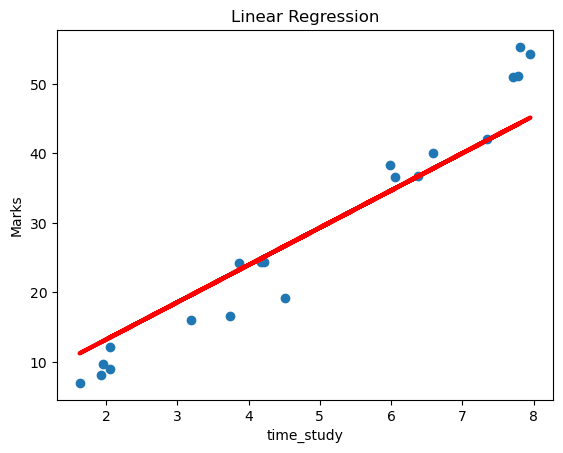

In [8]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)  #趨勢圖 x, 與預測出的結果 y
plt.xlabel('time_study')
plt.ylabel('Marks')
plt.title('Linear Regression')

## Metrics for model evaluation 模型評估指標

R-Squared value R 平方值
- 該值的範圍從 0-1。 越高表示表示預測變量完全解釋了 Y 的所有變化。

In [9]:
#Scikit-Learn 快速寫法
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))
print('Mean Square Error(MSE)', metrics.mean_squared_error(y_test, prediction))

Model R^2 Square value 0.9040228286990537
Mean Square Error(MSE) 25.23674562363223


- ***Residual Analysis 殘差分析***

總會有一些信息被遺漏，該信息可以從殘差信息中獲得。舉例來說，有個數據集可以了解某地區溫度與預測果汁的銷量。由回歸方程預測的值總是與實際值存在一些差異，銷售額「不會與真實完全匹配」稱為殘差。殘差圖有助於使用殘差值分析和改進模型。

1. 點與 0 的距離代表了該值的預測表現。0 值表示完美預測。
2. 如果值為正，則預測值較低。如果該值為負，則預測為高。
3. Prediction (預測) = Deterministic (確定性) + Statistic (統計)

Text(0, 0.5, 'Residual')

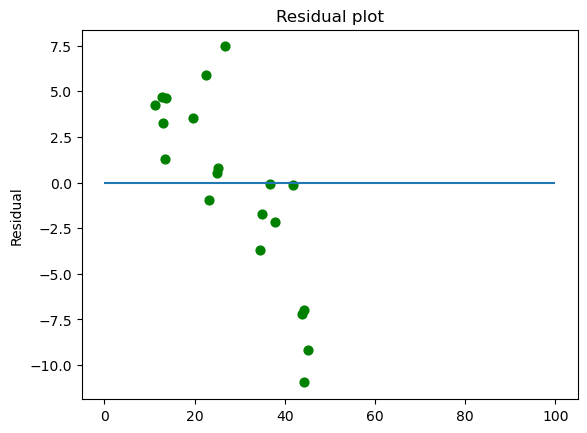

In [10]:
#Residual plot 殘差分析
plt.scatter(prediction, prediction-y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Linear Regression using Gradient Descent

In [11]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #計算總誤差。 它遵循公式 y=mx+c (m 是斜率，c 是截距)
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
    error = tot_error / float(len(x_train))
    return error, pred

In [12]:
#gradient descent 梯度下降
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
    return  s_slope, s_intercept

model:Slope [1.08533781]
model:Intercept [0.21071301]
model:Error value [736.68055534]
R squared value 736.680555340917


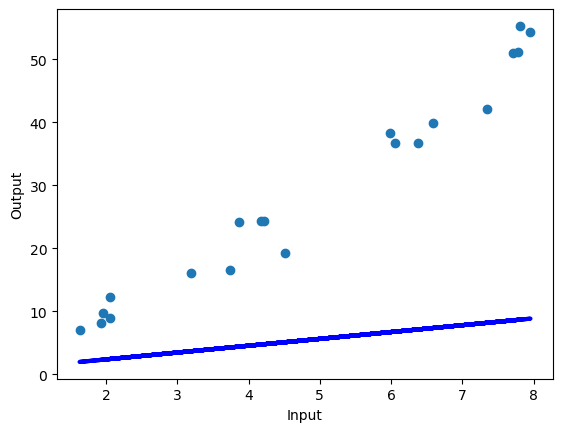

In [13]:
# defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
# intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)

print('model:Slope', grad_slope)
print('model:Intercept', grad_intercept)
print('model:Error value', final_e_value)
print('R squared value', metrics.mean_squared_error(y_test, prediction))

#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()